## Community analysis for hashtag network

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import itertools
import numpy as np
import pandas as pd
import pickle

data = pd.read_csv('all_hashtags_combined.csv')
G = nx.read_gpickle("hashtag_network.gpickle")

with open('users_and_follower_count.pickle', 'rb') as file:
    users_and_fcount = pickle.load(file)

In [2]:
def quick_summary_of_subgraph(G, data):
    
    tweets = set() # indexes of all tweets that contributed to the creation of graph G
    for n, nbrs in G.adj.items():
        for nbr, eattr in nbrs.items():
            for tweet_ind in eattr['tweet_list']:
                tweets.add(tweet_ind)
                
    print("### TOP 10 MOST SIGNIFICANT EDGES BASED ON THE NUMBER OF TWEETS MENTIONING BOTH END NODES ###")
    sig_edges = sorted(G.edges(data='tweet_count'), key=(lambda x: x[2]), reverse=True)
    try:
        for i in range(10):
            print(sig_edges[i])
    except IndexError:
        pass
      
    #word_count = {}
    #for t in data.loc[list(tweets)].text:
    #    parts = t.split(' ')
    #    for p in parts:
    #        value = word_count.get(p, None)
    #        if value == None:
    #            word_count[p] = 1
    #        else:
    #            word_count[p] = value + 1
    #word_count_sorted =  sorted(word_count.items(), key=(lambda k: k[1]), reverse=True)            
    #print("\n### MOST FREQUENT WORDS IN TWEET TEXTS ###")
    #for w,v in word_count_sorted:
    #    if v > 2:
    #        print((w,v))
    #
    
    print("\n### TOP 10 TWEETS SORTED BY FAVORITE COUNT ###")
    display(data.loc[list(tweets)].sort_values('favorites', ascending=False).iloc[:10])
     
    print("\n### TOP 10 TWEETS SORTED BY RETWEET COUNT ###")
    display(data.loc[list(tweets)].sort_values('retweets', ascending=False).iloc[:10])
       
    print("\n### ALL USERS THAT HAVE CONTRIBUTED TO THE CREATION OF THIS HASHTAG SUBGRAPH, SORTED BY NUMBER OF TWEETS")
    most_tweets = data.loc[list(tweets)].groupby(['user_id','username']).count().sort_values('time', ascending=False)['time']
    most_tweets = pd.DataFrame({'id': most_tweets.index.get_level_values(0), 'name': most_tweets.index.get_level_values(1), 'number_of_tweets': most_tweets.values})
    most_tweets['follower_count'] = most_tweets['id'].apply(lambda x: users_and_fcount[x] if x in users_and_fcount.keys() else np.nan)
    most_tweets.drop(columns=['id'], inplace=True)
    display(most_tweets)
    

## Clique

In [3]:
cliqs = list(nx.find_cliques(G)) # All cliques
cliqs = sorted(cliqs, key=len, reverse=True) # Sort from largest to smallest

In [4]:
len(cliqs) # How many cliques found

1752

In [ ]:
# Checking clique sizes from largest to smallest
for c in cliqs:
    print(len(c))

In [6]:
# Finding cliques, where the biggest tweet count edge attribute is over 100 tweets
big_cliqs = set()
for i, c in enumerate(cliqs):
    csub = G.subgraph(c)
    sig_edges = sorted(csub.edges(data='tweet_count'), key=(lambda x: x[2]), reverse=True)
    if sig_edges[0][2] > 100:
        big_cliqs.add(i)

In [ ]:
big_cliqs

In [8]:
plt.rcParams['figure.figsize'] = (10, 10)

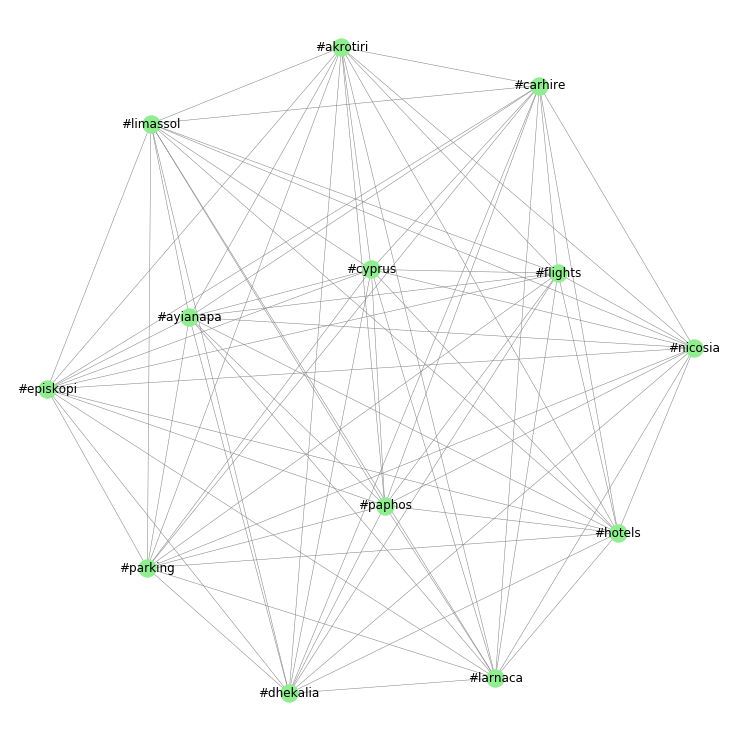

### TOP 10 MOST SIGNIFICANT EDGES BASED ON THE NUMBER OF TWEETS MENTIONING BOTH END NODES ###
('#parking', '#hotels', 194)
('#parking', '#flights', 182)
('#hotels', '#flights', 179)
('#parking', '#carhire', 174)
('#hotels', '#carhire', 173)
('#flights', '#carhire', 172)
('#parking', '#cyprus', 7)
('#hotels', '#cyprus', 6)
('#flights', '#cyprus', 6)
('#carhire', '#cyprus', 6)

### TOP 10 TWEETS SORTED BY FAVORITE COUNT ###


,time,user_id,username,text,retweets,favorites,tweet_hashtags,location,user_id_str
4507,2020-02-20 22:10:00,1061870264013807622,rideandrest,mountains use platform find,5,12,#cycletours #motorcycletouring #soar #bike #cy...,"spain, france, belgium, holland, italy, portug...",1061870264013807622
7235,2020-01-25 14:46:28,36655025,eminations,unable comment incredible example afternoon,2,10,#parking #fail #cyprus #nicosia #saturday,cyprus,36655025
8689,2020-01-12 18:10:04,321923816,forcescarhire,planning short break holiday business trip boo...,3,6,#carhire #parking #flights #hotels #travel #ho...,everywhere,321923816
8419,2020-01-15 07:06:01,321923816,forcescarhire,welcome thank following find cheapest prices a...,1,4,#carhire #parking #flights #hotels #buyveteran...,everywhere,321923816
3526,2020-03-02 06:24:46,321923816,forcescarhire,welcome thank following find cheapest prices a...,2,4,#carhire #parking #flights #hotels #worldwide ...,everywhere,321923816
8737,2020-01-12 08:28:00,321923816,forcescarhire,know would like scenic gem gateway airport sa...,2,3,#sundaymorning #geneva #alps #flights #hotels ...,everywhere,321923816
8561,2020-01-14 07:04:59,321923816,forcescarhire,proud support ssafa amp blesma donating £1 amp...,2,3,#ct #ssafa #blesma #carrental #flights #hotels...,everywhere,321923816
7015,2020-01-28 07:00:11,321923816,forcescarhire,proud support ssafa amp blesma donating £1 amp...,2,3,#ct #ssafa #blesma #carrentals #carhire #fligh...,everywhere,321923816
8021,2020-01-18 08:11:57,321923816,forcescarhire,know would like beach getaway great surf amp b...,1,2,#saturdaymorning #biarritz #hotels #flights #c...,everywhere,321923816
2675,2020-03-10 09:15:07,321923816,forcescarhire,proud support ssafa amp blesma donating £1 amp...,2,2,#ct #ssafa #blesma #carhire #flights #hotels #...,everywhere,321923816



### TOP 10 TWEETS SORTED BY RETWEET COUNT ###


,time,user_id,username,text,retweets,favorites,tweet_hashtags,location,user_id_str
4507,2020-02-20 22:10:00,1061870264013807622,rideandrest,mountains use platform find,5,12,#cycletours #motorcycletouring #soar #bike #cy...,"spain, france, belgium, holland, italy, portug...",1061870264013807622
8689,2020-01-12 18:10:04,321923816,forcescarhire,planning short break holiday business trip boo...,3,6,#carhire #parking #flights #hotels #travel #ho...,everywhere,321923816
6347,2020-02-03 18:30:25,321923816,forcescarhire,find deals one online place save amp save amp ...,3,2,#canada #carhire #flights #parking #hotels #ed...,everywhere,321923816
8783,2020-01-11 14:15:08,321923816,forcescarhire,january savers white sands amp warm waters ind...,3,2,#maldives #flights #hotels #resorts #uk #parki...,everywhere,321923816
7015,2020-01-28 07:00:11,321923816,forcescarhire,proud support ssafa amp blesma donating £1 amp...,2,3,#ct #ssafa #blesma #carrentals #carhire #fligh...,everywhere,321923816
8661,2020-01-13 06:37:21,321923816,forcescarhire,know would like city megamalls theme parks amp...,2,2,#mondaymorning #dubai #flights #hotels #carhir...,everywhere,321923816
2675,2020-03-10 09:15:07,321923816,forcescarhire,proud support ssafa amp blesma donating £1 amp...,2,2,#ct #ssafa #blesma #carhire #flights #hotels #...,everywhere,321923816
8561,2020-01-14 07:04:59,321923816,forcescarhire,proud support ssafa amp blesma donating £1 amp...,2,3,#ct #ssafa #blesma #carrental #flights #hotels...,everywhere,321923816
9488,2020-01-04 08:26:40,321923816,forcescarhire,know would like city gondolas amp amazing res...,2,2,#saturdaymorning #venice #flights #hotels #car...,everywhere,321923816
4485,2020-02-21 09:10:06,321923816,forcescarhire,big thank following good weekend amp safe trav...,2,2,#ff #travel #carhire #parking #flights #hotels,everywhere,321923816



### ALL USERS THAT HAVE CONTRIBUTED TO THE CREATION OF THIS HASHTAG SUBGRAPH, SORTED BY NUMBER OF TWEETS


,name,number_of_tweets,follower_count
0,forcescarhire,180,1582
1,hoteldivasf,3,423
2,FeigElectronics,2,308
3,1000LED,2,33
4,eminations,1,1296
5,maldivesreisen,1,1216
6,jontutoring,1,147
7,Book2park,1,480
8,smcintoshplan,1,1339
9,mymoneycompare,1,943


In [9]:
# This is just some manual checking of different communities...

# 6 = pets and parking
# 7 = family + apartment + parking, also num 9 advertising pet-allowed homes + parking
# 14 = parking related, fines, tickets, problems ect
# 16 = electric cars, sustainability
clique_graph = G.subgraph(cliqs[16])
pos = nx.spring_layout(clique_graph)
nx.draw(clique_graph, pos, with_labels=True, width=0.5, node_color='lightgreen', edge_color='grey')
#nx.draw_networkx_edge_labels(clique_graph, pos, edge_labels=nx.get_edge_attributes(clique_graph, name='tweet_count'), 
 #                            font_size=10,label_pos = 0.5)
plt.show()
quick_summary_of_subgraph(clique_graph, data)

In [10]:
# The following commented out codes are also some manual checking, taking out to reduce size of return...

In [11]:
#clique1_graph = G.subgraph(cliqs[0])
#nx.draw(clique1_graph, with_labels=True, width=0.5, node_color='lightgreen', edge_color='grey')
#plt.savefig("largest_clique.png")
#plt.show()
#quick_summary_of_subgraph(clique1_graph, data)

In [12]:
#clique2_graph = G.subgraph(cliqs[1])
#nx.draw(clique2_graph, with_labels=True, width=0.5, node_color='lightgreen', edge_color='grey')
#plt.savefig("second_largest_clique.png")
#plt.show()
#quick_summary_of_subgraph(clique2_graph, data)

In [13]:
#clique3_graph = G.subgraph(cliqs[2])
#nx.draw(clique3_graph, with_labels=True, width=0.5, node_color='lightgreen', edge_color='grey')
#plt.savefig("third_largest_clique.png")
#plt.show()
#quick_summary_of_subgraph(clique3_graph, data)

In [14]:
#clique15_graph = G.subgraph(cliqs[14])
#nx.draw(clique15_graph, with_labels=True, width=0.5, node_color='lightgreen', edge_color='grey')
#plt.show()
#quick_summary_of_subgraph(clique15_graph, data)

In [15]:
#clique21_graph = G.subgraph(cliqs[20])
#nx.draw(clique21_graph, with_labels=True, width=0.5, node_color='lightgreen', edge_color='grey')
#plt.show()
#quick_summary_of_subgraph(clique21_graph, data)

In [16]:
#clique29_graph = G.subgraph(cliqs[28])
#nx.draw(clique29_graph, with_labels=True, width=0.5, node_color='lightgreen', edge_color='grey')
#plt.show()
#quick_summary_of_subgraph(clique29_graph, data)

In [17]:
#clique51_graph = G.subgraph(cliqs[50])
#nx.draw(clique51_graph, with_labels=True, width=0.5, node_color='lightgreen', edge_color='grey')
#plt.show()
#quick_summary_of_subgraph(clique51_graph, data)

In [18]:
#clique211_graph = G.subgraph(['#parking',
#   '#smartcities',
#   '#smartcity',
#   '#transportation',
#   '#health',
#   '#technologies',
#   '#energy',
#   '#safety',
#   '#lighting'])
#nx.draw(clique211_graph, with_labels=True, width=0.5, node_color='lightgreen', edge_color='grey')
#plt.show()
#quick_summary_of_subgraph(clique211_graph, data)

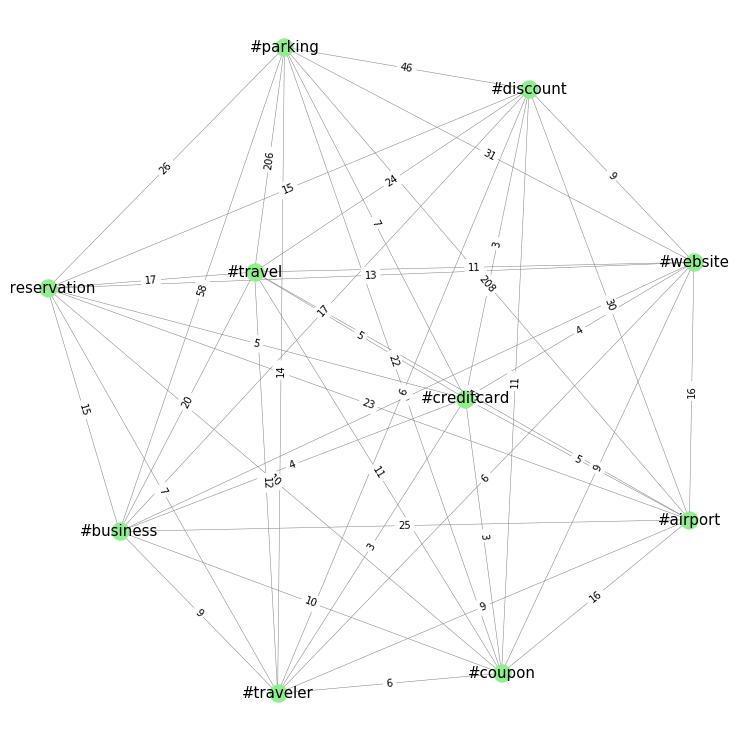

### TOP 10 MOST SIGNIFICANT EDGES BASED ON THE NUMBER OF TWEETS MENTIONING BOTH END NODES ###
('#parking', '#airport', 208)
('#parking', '#travel', 206)
('#parking', '#business', 58)
('#airport', '#travel', 53)
('#parking', '#discount', 46)
('#parking', '#website', 31)
('#airport', '#discount', 30)
('#parking', '#reservation', 26)
('#airport', '#business', 25)
('#travel', '#discount', 24)

### TOP 10 TWEETS SORTED BY FAVORITE COUNT ###


,time,user_id,username,text,retweets,favorites,tweet_hashtags,location,user_id_str
866,2020-03-30 17:01:33,1144228884235395072,SENAirTraffic,room small one ve busy arrivals afternoon mult...,57,297,#coronavirus #mondaymotivation #airport #offic...,"southend, england",1144228884235395072
865,2020-03-30 17:01:38,1144228884235395072,SENAirTraffic,come bring ezy base 19 combined total 36 airfr...,9,43,#aircraft #southend #coronavirus #airport #avi...,"southend, england",1144228884235395072
5327,2020-02-12 23:27:13,2283514753,ZiaWadud,tncs reduce demand yes 13 year since introduct...,0,8,#uber #lyft #airport #parking,university of leeds,2283514753
1501,2020-03-23 00:14:04,1014497945905967104,WH_Aviation84,unfortunately s come soon many many parked pla...,2,7,#avgeek #boeing #boeing777 #b777 #plane #plane...,"houston, tx",1014497945905967104
8651,2020-01-13 09:52:46,862212060201070592,ethworks,monday far today would like show new illustrat...,0,6,#ethworks #illustration #mobile #parking #regi...,"warsaw, poland",862212060201070592
8689,2020-01-12 18:10:04,321923816,forcescarhire,planning short break holiday business trip boo...,3,6,#carhire #parking #flights #hotels #travel #ho...,everywhere,321923816
5632,2020-02-10 14:58:46,92376550,justbor,looking storage private private oder help 9 lo...,2,6,#officespace #storage #parking #business #gewe...,"germany,nrw",92376550
3444,2020-03-02 17:09:49,155633376,airmarietta,parking family rewards program would make much...,0,5,#airport #parking #travel #familytravel,"highlands ranch, co",155633376
6292,2020-02-04 10:57:20,196088545,Bananamediaco,go passionate towards,0,5,#creative #bananamediakw #printing #material #...,"the capital, kuwait",196088545
4284,2020-02-23 13:13:43,446518296,Burkesbus,beautiful morning tuam main bus stop location...,1,5,#stop #location #busstop #tuam #galway #public...,galway,446518296



### TOP 10 TWEETS SORTED BY RETWEET COUNT ###


,time,user_id,username,text,retweets,favorites,tweet_hashtags,location,user_id_str
866,2020-03-30 17:01:33,1144228884235395072,SENAirTraffic,room small one ve busy arrivals afternoon mult...,57,297,#coronavirus #mondaymotivation #airport #offic...,"southend, england",1144228884235395072
865,2020-03-30 17:01:38,1144228884235395072,SENAirTraffic,come bring ezy base 19 combined total 36 airfr...,9,43,#aircraft #southend #coronavirus #airport #avi...,"southend, england",1144228884235395072
8514,2020-01-14 13:40:07,135917307,ACTRAVELSERVICE,airport parking use code sixback checkout sa...,5,2,#airports #parking #digitalmarketing #onlinema...,"washington, dc dmv (va-dc-md)",135917307
5112,2020-02-14 16:41:11,2873796810,SpokaneJofB,downtown partnership working new vision downto...,4,4,#spokane #parking #transit #housing #jofb #inw...,"spokane, wa",2873796810
8689,2020-01-12 18:10:04,321923816,forcescarhire,planning short break holiday business trip boo...,3,6,#carhire #parking #flights #hotels #travel #ho...,everywhere,321923816
4474,2020-02-21 10:54:25,724536250657447940,getmyparking,2019 airport announced invested £12 million ne...,3,3,#edinburgh #valetparking #dropandgo #airport #...,"new delhi, india",724536250657447940
4623,2020-02-19 23:21:14,2283514753,ZiaWadud,reduce yes around 13 year full paper publishe...,3,4,#uber #lyft #tnc #airport #parking,university of leeds,2283514753
1501,2020-03-23 00:14:04,1014497945905967104,WH_Aviation84,unfortunately s come soon many many parked pla...,2,7,#avgeek #boeing #boeing777 #b777 #plane #plane...,"houston, tx",1014497945905967104
7330,2020-01-24 14:00:30,321923816,forcescarhire,destination find deals one online place save a...,2,1,#scotland #travel #carhire #flights #parking #...,everywhere,321923816
4485,2020-02-21 09:10:06,321923816,forcescarhire,big thank following good weekend amp safe trav...,2,2,#ff #travel #carhire #parking #flights #hotels,everywhere,321923816



### ALL USERS THAT HAVE CONTRIBUTED TO THE CREATION OF THIS HASHTAG SUBGRAPH, SORTED BY NUMBER OF TWEETS


,name,number_of_tweets,follower_count
0,forcescarhire,104,1582.0
1,Book2park,47,480.0
2,RoyalParkingSL,44,407.0
3,smarttravelUK,36,231.0
4,a1expresstampa,11,98.0
5,_TheIPC,11,442.0
6,PSRltd,8,663.0
7,scorefoothills,5,166.0
8,Staton_Young,4,380.0
9,B4uCabs,4,3.0


In [19]:
cliquetravel_graph = G.subgraph(['#parking',
   '#creditcard',
   '#travel',
   '#website',
   '#reservation',
   '#business',
   '#airport',
   '#coupon',
   '#traveler',
   '#discount'])
pos = nx.spring_layout(cliquetravel_graph)
nx.draw(cliquetravel_graph, pos, with_labels=True, width=0.5, font_size=15, node_color='lightgreen', edge_color='grey')
nx.draw_networkx_edge_labels(cliquetravel_graph, pos, edge_labels=nx.get_edge_attributes(cliquetravel_graph, name='tweet_count'), 
                             font_size=10,label_pos = 0.5)
plt.savefig("hashtag_clique_travel.png")
plt.show()
quick_summary_of_subgraph(cliquetravel_graph, data)

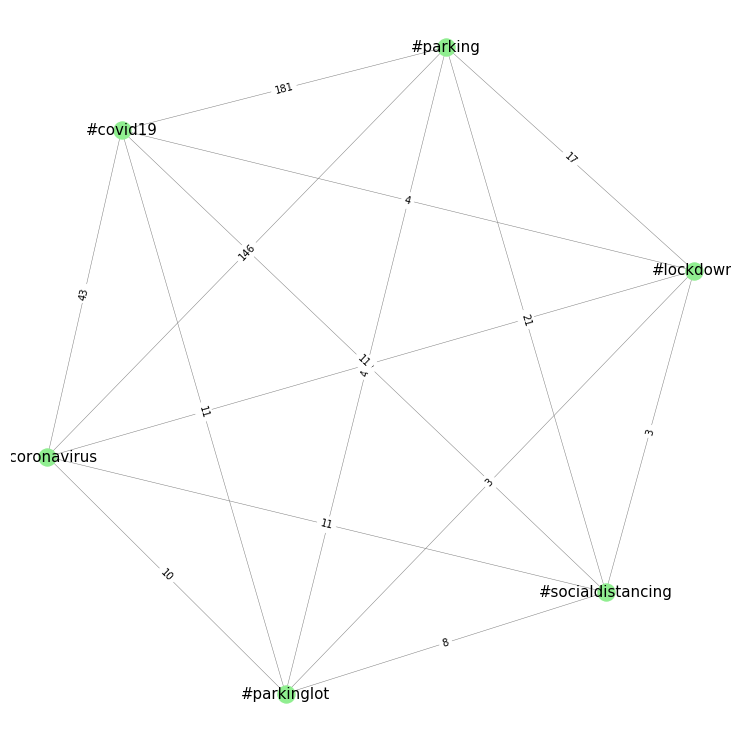

### TOP 10 MOST SIGNIFICANT EDGES BASED ON THE NUMBER OF TWEETS MENTIONING BOTH END NODES ###
('#parking', '#covid19', 181)
('#parking', '#coronavirus', 146)
('#parking', '#parkinglot', 48)
('#coronavirus', '#covid19', 43)
('#parking', '#socialdistancing', 21)
('#parking', '#lockdown', 17)
('#parkinglot', '#covid19', 11)
('#coronavirus', '#socialdistancing', 11)
('#socialdistancing', '#covid19', 11)
('#parkinglot', '#coronavirus', 10)

### TOP 10 TWEETS SORTED BY FAVORITE COUNT ###


,time,user_id,username,text,retweets,favorites,tweet_hashtags,location,user_id_str
866,2020-03-30 17:01:33,1144228884235395072,SENAirTraffic,room small one ve busy arrivals afternoon mult...,57,297,#coronavirus #mondaymotivation #airport #offic...,"southend, england",1144228884235395072
898,2020-03-30 12:35:08,333502135,BenedictePaviot,caring neighbours nurse improvised space outsi...,10,55,#surprise #nhs #parking #covid19 #golborne #wi...,NaN,333502135
865,2020-03-30 17:01:38,1144228884235395072,SENAirTraffic,come bring ezy base 19 combined total 36 airfr...,9,43,#aircraft #southend #coronavirus #airport #avi...,"southend, england",1144228884235395072
814,2020-03-31 14:49:44,22191259,RolandN,corona journal day 14 wait patiently,4,31,#coronacreativity #socialdistancing #stayathom...,"south east, england",22191259
1817,2020-03-18 18:39:56,19637668,MayorWebber,santa fe suspending fees meters bagged lots fr...,8,28,#parking #socialdistancing #flatteningthecurve,new mexico,19637668
2012,2020-03-17 02:20:04,21466569,TheEastsiderLA,city los angeles issue tickets two weeks stree...,13,24,#parking #coronavirus #covid19,"los angeles, california",21466569
1811,2020-03-18 19:57:38,595950276,PeterMassini,despite quite rightly dominating forms media s...,7,19,#coronavirus #london #streets #parking,#london & #robertsbridge,595950276
1477,2020-03-23 10:45:40,824621805549879297,CllrPeterCraske,part response impact pandemic introducing emer...,14,18,#covid19 #free #parking,blackfen & lamorbey ward,824621805549879297
1810,2020-03-18 20:12:12,29197155,OOIDA,update s,9,18,#pennsylvania #truckparking #truckdrivers #tru...,"grain valley, mo",29197155
403,2020-04-06 14:20:21,301946367,jct17m4pitstop,drivers salute everything us right really appr...,6,15,#coronavirus #drivers #thumbsupfortruckers #pa...,chippenham,301946367



### TOP 10 TWEETS SORTED BY RETWEET COUNT ###


,time,user_id,username,text,retweets,favorites,tweet_hashtags,location,user_id_str
866,2020-03-30 17:01:33,1144228884235395072,SENAirTraffic,room small one ve busy arrivals afternoon mult...,57,297,#coronavirus #mondaymotivation #airport #offic...,"southend, england",1144228884235395072
215,2020-04-08 16:15:06,735402159462813697,nepp_parking,key worker nt delay get exemption volunteers t...,15,8,#essex #free #parking #covid19,"north essex, england",735402159462813697
1477,2020-03-23 10:45:40,824621805549879297,CllrPeterCraske,part response impact pandemic introducing emer...,14,18,#covid19 #free #parking,blackfen & lamorbey ward,824621805549879297
2012,2020-03-17 02:20:04,21466569,TheEastsiderLA,city los angeles issue tickets two weeks stree...,13,24,#parking #coronavirus #covid19,"los angeles, california",21466569
898,2020-03-30 12:35:08,333502135,BenedictePaviot,caring neighbours nurse improvised space outsi...,10,55,#surprise #nhs #parking #covid19 #golborne #wi...,NaN,333502135
714,2020-04-01 15:38:04,735402159462813697,nepp_parking,north key workers emergency services food driv...,9,6,#essex #volunteer #covid19 #free #parking,"north essex, england",735402159462813697
865,2020-03-30 17:01:38,1144228884235395072,SENAirTraffic,come bring ezy base 19 combined total 36 airfr...,9,43,#aircraft #southend #coronavirus #airport #avi...,"southend, england",1144228884235395072
1810,2020-03-18 20:12:12,29197155,OOIDA,update s,9,18,#pennsylvania #truckparking #truckdrivers #tru...,"grain valley, mo",29197155
1817,2020-03-18 18:39:56,19637668,MayorWebber,santa fe suspending fees meters bagged lots fr...,8,28,#parking #socialdistancing #flatteningthecurve,new mexico,19637668
1443,2020-03-23 15:00:47,735402159462813697,nepp_parking,asking motorists act responsibly observe safe...,7,6,#parking #parkright #coronavirus,"north essex, england",735402159462813697



### ALL USERS THAT HAVE CONTRIBUTED TO THE CREATION OF THIS HASHTAG SUBGRAPH, SORTED BY NUMBER OF TWEETS


,name,number_of_tweets,follower_count
0,PSRltd,34,663
1,_TheIPC,31,442
2,TheEastsiderLA,9,22386
3,GridlockSam,7,12698
4,Nnp17WRNcxfuLAB,6,7
5,nepp_parking,6,374
6,parkingtoday,5,2679
7,IPMInow,4,3668
8,HealthBusiness_,3,1605
9,B4uCabs,3,3


In [20]:
cliqueco_graph = G.subgraph(['#parking',
   '#parkinglot',
   '#socialdistancing',
   '#covid19',
   '#coronavirus',
   '#lockdown'])
pos = nx.spring_layout(cliqueco_graph)
nx.draw(cliqueco_graph, pos, with_labels=True, font_size=15, width=0.5, node_color='lightgreen', edge_color='grey')
nx.draw_networkx_edge_labels(cliqueco_graph, pos, edge_labels=nx.get_edge_attributes(cliqueco_graph, name='tweet_count'), 
                             font_size=10,label_pos = 0.5)
plt.savefig("hashtag_clique_corona.png")
plt.show()
quick_summary_of_subgraph(cliqueco_graph, data)

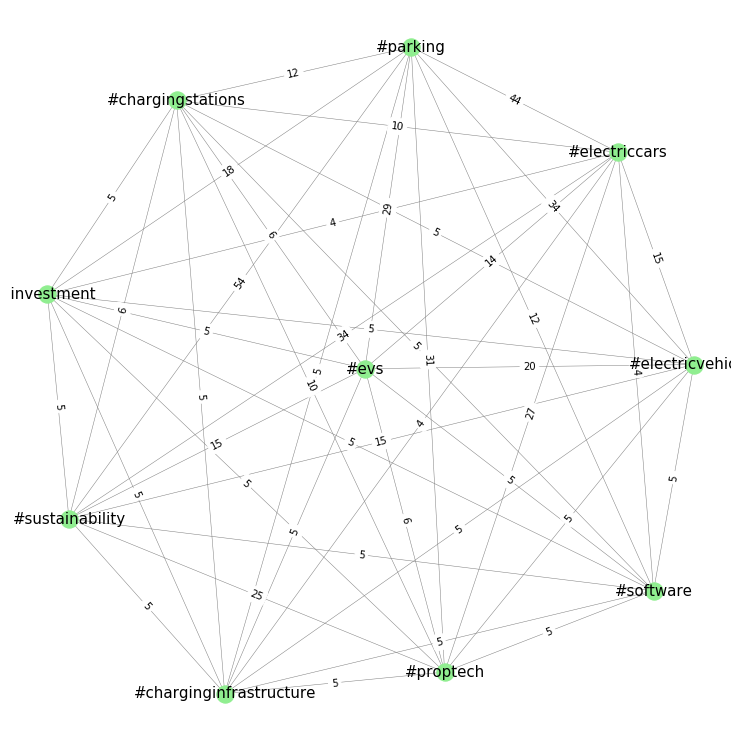

### TOP 10 MOST SIGNIFICANT EDGES BASED ON THE NUMBER OF TWEETS MENTIONING BOTH END NODES ###
('#parking', '#sustainability', 54)
('#parking', '#electriccars', 44)
('#parking', '#electricvehicles', 34)
('#electriccars', '#sustainability', 34)
('#parking', '#proptech', 31)
('#parking', '#evs', 29)
('#electriccars', '#proptech', 27)
('#sustainability', '#proptech', 25)
('#evs', '#electricvehicles', 20)
('#parking', '#investment', 18)

### TOP 10 TWEETS SORTED BY FAVORITE COUNT ###


,time,user_id,username,text,retweets,favorites,tweet_hashtags,location,user_id_str
9329,2020-01-06 11:28:02,551726791,shivaniwrites,2019 got let 2020 delivery column,13,26,#delhi #policies #walkability #parking #electr...,"new delhi, india",551726791
6174,2020-02-05 11:14:51,3684890896,BMWi3guide,live available allocated want able charge plea...,13,17,#flat #apartment #parking #ev #chargers #elect...,"brighton, england",3684890896
8340,2020-01-15 18:16:36,802153948991918080,TechCompanyNews,developer management raised 60m new round,8,11,#parking #software #funding,editorial@techcompanynews.com,802153948991918080
9144,2020-01-08 11:17:25,724536250657447940,getmyparking,dynamics urban mobility change parking issues ...,4,8,#parkingsystems #sustainability #parking,"new delhi, india",724536250657447940
8438,2020-01-15 02:35:40,284065755,urbaneer,knew would convince grant front pad,6,8,#tesla #toronto #parking #tore #torontorealest...,toronto ontario canada,284065755
6806,2020-01-29 22:58:01,344287992,FloraArchitect,evening pleasure talking caversham heights soc...,0,8,#housingcrisis #housing #sustainability #parking,"cardiff, wales",344287992
9132,2020-01-08 12:45:36,430686714,CIT_UPC,laia pagès executive research manager blockch...,4,6,#blockchain #mobility #urbanmobility #parking ...,"barcelona, spain",430686714
3104,2020-03-05 16:36:53,201292093,benjaminhgordon,teased new feature way useful reverse smart s...,3,4,#elonmusk #tesla #smartsummon #parking #transp...,"palm beach, fl",201292093
8065,2020-01-17 18:03:42,803210395112439808,HuaweiUK,know empowered help save billions litres fuel ...,1,3,#smart #parking #digitaltransformation #sustai...,united kingdom,803210395112439808
2450,2020-03-12 07:41:13,1137010005020958720,TrafficTechMag,partnership offers 3d road network modelling c...,2,3,#3d #modelling #mapping #navigation #parking #...,www.traffictechnologytoday.com,1137010005020958720



### TOP 10 TWEETS SORTED BY RETWEET COUNT ###


,time,user_id,username,text,retweets,favorites,tweet_hashtags,location,user_id_str
9329,2020-01-06 11:28:02,551726791,shivaniwrites,2019 got let 2020 delivery column,13,26,#delhi #policies #walkability #parking #electr...,"new delhi, india",551726791
6174,2020-02-05 11:14:51,3684890896,BMWi3guide,live available allocated want able charge plea...,13,17,#flat #apartment #parking #ev #chargers #elect...,"brighton, england",3684890896
8340,2020-01-15 18:16:36,802153948991918080,TechCompanyNews,developer management raised 60m new round,8,11,#parking #software #funding,editorial@techcompanynews.com,802153948991918080
8438,2020-01-15 02:35:40,284065755,urbaneer,knew would convince grant front pad,6,8,#tesla #toronto #parking #tore #torontorealest...,toronto ontario canada,284065755
3732,2020-02-28 13:17:48,1090631891743637511,CEO_Chipside,global spending smart city initiatives set rea...,6,2,#smartcities #parking #sustainability #technology,"swindon, england",1090631891743637511
9132,2020-01-08 12:45:36,430686714,CIT_UPC,laia pagès executive research manager blockch...,4,6,#blockchain #mobility #urbanmobility #parking ...,"barcelona, spain",430686714
9144,2020-01-08 11:17:25,724536250657447940,getmyparking,dynamics urban mobility change parking issues ...,4,8,#parkingsystems #sustainability #parking,"new delhi, india",724536250657447940
3104,2020-03-05 16:36:53,201292093,benjaminhgordon,teased new feature way useful reverse smart s...,3,4,#elonmusk #tesla #smartsummon #parking #transp...,"palm beach, fl",201292093
7606,2020-01-22 09:37:01,770885941242232832,CallumDay_,nottingham 4 uk cities looking innovative idea...,2,2,#renewables #housing #smartgrids #parking #evs,"reading, england",770885941242232832
784,2020-03-31 19:24:10,1705267112,TOStevefor3,rt check based called electric vehicle chargi...,2,2,#new #innovative #electricvehicle #charging #s...,toronto,1705267112



### ALL USERS THAT HAVE CONTRIBUTED TO THE CREATION OF THIS HASHTAG SUBGRAPH, SORTED BY NUMBER OF TWEETS


,name,number_of_tweets,follower_count
0,TOStevefor3,41,1431
1,WeAreParkaze,4,37
2,PSRltd,3,663
3,MotusIsuzuPU,3,107
4,AsuraLPR,3,78
5,MotusBVDUsed,2,145
6,parkingtoday,2,2679
7,BritishParking,2,3538
8,MotusFiatPro,2,54
9,motus_ford,2,81


In [21]:
cliquesus_graph = G.subgraph(['#parking',
   '#investment',
   '#sustainability',
   '#electriccars',
   '#proptech',
   '#chargingstations',
   '#electricvehicles',
   '#software',
   '#charginginfrastructure',
   '#evs'])
pos = nx.spring_layout(cliquesus_graph)
nx.draw(cliquesus_graph, pos, with_labels=True, width=0.5, font_size=15, node_color='lightgreen', edge_color='grey')
nx.draw_networkx_edge_labels(cliquesus_graph, pos, edge_labels=nx.get_edge_attributes(cliquesus_graph, name='tweet_count'), 
                             font_size=10,label_pos = 0.5)
plt.savefig("hashtag_clique_sustainability.png")
plt.show()
quick_summary_of_subgraph(cliquesus_graph, data)

In [22]:
num_of_cliqs_for_each_node = nx.number_of_cliques(G)

In [ ]:
sorted(num_of_cliqs_for_each_node.items(), key=(lambda k: k[1]), reverse=True) # Showing in how many cliques each node is present

In [24]:
nx.cliques_containing_node(G, ['#lookingforparking']) # this was used to manually find cliques that have the node of interest in them

{'#lookingforparking': [['#parking',
   '#parkaze',
   '#boston',
   '#lookingforparking',
   '#sustainability']]}

## k-plex

In [ ]:
#from kplex_github import * # importing the needed k-plex code, that was found from github

In [ ]:
# Finding plexes, takes time and space!!!
#k = 2
#kplexes, kplexesMax = kplexAlg(G, k)

#with open('2_plexexMax_hashtag.pickle', 'wb') as file:
#    pickle.dump(kplexesMax, file)

In [26]:
with open('2_plexexMax_hashtag.pickle', 'rb') as file:
    kplexes2Max = pickle.load(file)

In [ ]:
sorted(kplexes2Max, key=(lambda x: len(x)), reverse=True) # Observing found 2-plexes, sorted by the size

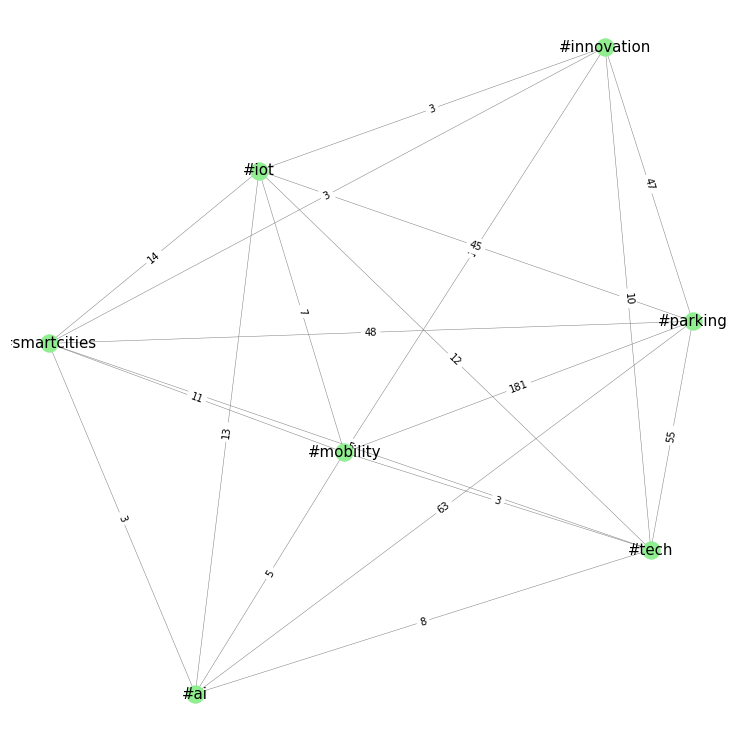

### TOP 10 MOST SIGNIFICANT EDGES BASED ON THE NUMBER OF TWEETS MENTIONING BOTH END NODES ###
('#mobility', '#parking', 181)
('#parking', '#ai', 63)
('#parking', '#tech', 55)
('#parking', '#smartcities', 48)
('#parking', '#innovation', 47)
('#parking', '#iot', 45)
('#smartcities', '#iot', 14)
('#mobility', '#innovation', 13)
('#ai', '#iot', 13)
('#tech', '#iot', 12)

### TOP 10 TWEETS SORTED BY FAVORITE COUNT ###


,time,user_id,username,text,retweets,favorites,tweet_hashtags,location,user_id_str
3586,2020-03-01 05:40:06,968008274003005440,PawlowskiMario,ready car saves space amp time,80,60,#autonomousvehicles #automated #parking #iot #...,chicago il,968008274003005440
9223,2020-01-07 14:34:29,911245230426525697,Fetch_ai,re building infrastructure tomorrow enable res...,20,43,#smartcities #parking #energy #privacy #fet #a...,NaN,911245230426525697
9161,2020-01-08 08:50:44,911245230426525697,Fetch_ai,life journey destination nt journey spent wast...,12,34,#parking #fet #ai #traffic,NaN,911245230426525697
9485,2020-01-04 09:00:00,911245230426525697,Fetch_ai,tired wasting time trying find spot answer vid...,13,33,#parking #autonomousagents #fet #ai #traffic #...,NaN,911245230426525697
6601,2020-01-31 15:49:07,968008274003005440,PawlowskiMario,360 degree wheel design lets conquer parallel rt,19,31,#parking #artificialintelligence #mi #robotics...,chicago il,968008274003005440
6388,2020-02-03 13:25:33,1072753450801397760,Ben_Sulayem,many people disabilities use car vital indepen...,4,18,#mobility #parking #disabilities,"dubái, united arab emirates",1072753450801397760
9393,2020-01-05 16:11:15,787150986313801728,Chooch_AI,detecting parking space available real time ar...,12,17,#imagerecognition #ai #artificialintelligence ...,"san francisco, ca",787150986313801728
4896,2020-02-17 13:53:22,1087696556067831809,Alliot_Tech,new re delighted announce new partnership disc...,9,14,#lorawan #europe #alliot #iot #parking #sensor...,huddersfield,1087696556067831809
3582,2020-03-01 08:19:23,48707597,wil_bielert,ready car saves space amp time,11,9,#autonomousvehicles #automated #parking #iot #...,quebec,48707597
4715,2020-02-19 09:38:41,1137010005020958720,TrafficTechMag,poor maps costing delivery companies us 6bn an...,3,8,#maps #mapping #delivery #report #ai #machinev...,www.traffictechnologytoday.com,1137010005020958720



### TOP 10 TWEETS SORTED BY RETWEET COUNT ###


,time,user_id,username,text,retweets,favorites,tweet_hashtags,location,user_id_str
3586,2020-03-01 05:40:06,968008274003005440,PawlowskiMario,ready car saves space amp time,80,60,#autonomousvehicles #automated #parking #iot #...,chicago il,968008274003005440
9223,2020-01-07 14:34:29,911245230426525697,Fetch_ai,re building infrastructure tomorrow enable res...,20,43,#smartcities #parking #energy #privacy #fet #a...,NaN,911245230426525697
6601,2020-01-31 15:49:07,968008274003005440,PawlowskiMario,360 degree wheel design lets conquer parallel rt,19,31,#parking #artificialintelligence #mi #robotics...,chicago il,968008274003005440
9485,2020-01-04 09:00:00,911245230426525697,Fetch_ai,tired wasting time trying find spot answer vid...,13,33,#parking #autonomousagents #fet #ai #traffic #...,NaN,911245230426525697
9393,2020-01-05 16:11:15,787150986313801728,Chooch_AI,detecting parking space available real time ar...,12,17,#imagerecognition #ai #artificialintelligence ...,"san francisco, ca",787150986313801728
9161,2020-01-08 08:50:44,911245230426525697,Fetch_ai,life journey destination nt journey spent wast...,12,34,#parking #fet #ai #traffic,NaN,911245230426525697
3582,2020-03-01 08:19:23,48707597,wil_bielert,ready car saves space amp time,11,9,#autonomousvehicles #automated #parking #iot #...,quebec,48707597
4896,2020-02-17 13:53:22,1087696556067831809,Alliot_Tech,new re delighted announce new partnership disc...,9,14,#lorawan #europe #alliot #iot #parking #sensor...,huddersfield,1087696556067831809
3732,2020-02-28 13:17:48,1090631891743637511,CEO_Chipside,global spending smart city initiatives set rea...,6,2,#smartcities #parking #sustainability #technology,"swindon, england",1090631891743637511
6854,2020-01-29 14:59:58,2788296475,JaredCouncil,new debuting system year let parking operators...,5,5,#ai #parking #tech #digitaltransformation,"new jersey, usa",2788296475



### ALL USERS THAT HAVE CONTRIBUTED TO THE CREATION OF THIS HASHTAG SUBGRAPH, SORTED BY NUMBER OF TWEETS


,name,number_of_tweets,follower_count
0,parkingtoday,71,2679
1,AIGoldCoast,26,68
2,TOStevefor3,26,1431
3,IPMInow,13,3668
4,UsaZipby,8,26
5,LaneySolutions,7,1189
6,cleverciti,6,395
7,SpaceGenius2,5,213
8,smartcityvwpts,5,1556
9,CityTech_,5,7925


In [28]:
# Several plexes were observed, but only one left to reduce size of return:
plex_graph = G.subgraph(['#ai',
  '#innovation',
  '#iot',
  '#mobility',
  '#parking',
  '#smartcities',
  '#tech'])
pos = nx.spring_layout(plex_graph)
nx.draw(plex_graph, pos, with_labels=True, width=0.5, font_size=15, node_color='lightgreen', edge_color='grey')
nx.draw_networkx_edge_labels(plex_graph, pos, edge_labels=nx.get_edge_attributes(plex_graph, name='tweet_count'), 
                             font_size=10,label_pos = 0.5)
plt.savefig("2plex_hashtag_network.png")
plt.show()
quick_summary_of_subgraph(plex_graph, data)

In [29]:
min(plex_graph.degree(), key=(lambda k: k[1]))[1] # Checking the lowest degree in the graph

5

## k-core

In [30]:
k_core_graph = nx.k_core(G, k = 16) # The second biggest k-core, biggest was basically same as largest clique

In [31]:
min(k_core_graph.degree(), key=(lambda k: k[1]))[1] # Checking the value of k

16

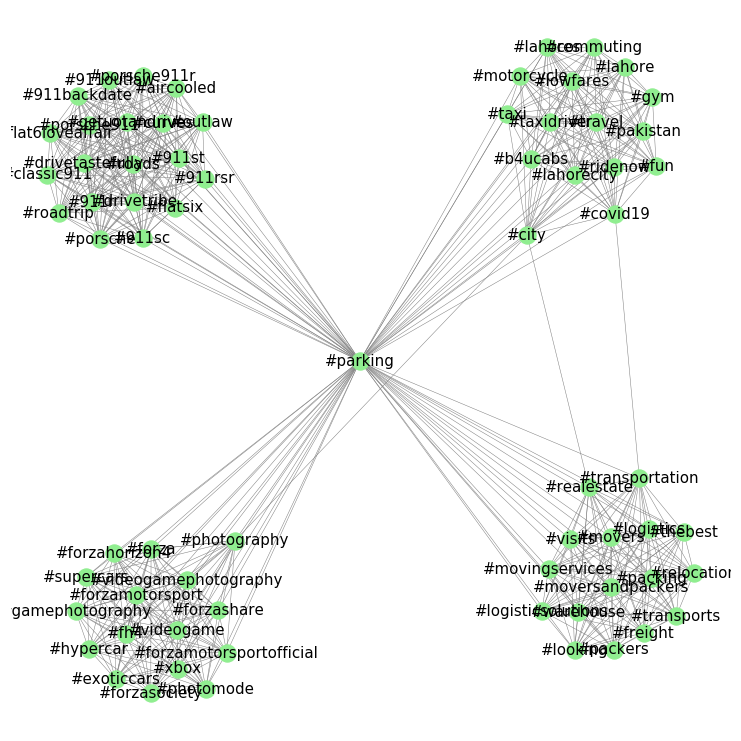

### TOP 10 MOST SIGNIFICANT EDGES BASED ON THE NUMBER OF TWEETS MENTIONING BOTH END NODES ###
('#parking', '#travel', 206)
('#covid19', '#parking', 181)
('#parking', '#transportation', 97)
('#parking', '#realestate', 72)
('#parking', '#city', 49)
('#parking', '#photography', 25)
('#parking', '#logistics', 22)
('#gym', '#parking', 21)
('#parking', '#roads', 20)
('#parking', '#freight', 17)

### TOP 10 TWEETS SORTED BY FAVORITE COUNT ###


,time,user_id,username,text,retweets,favorites,tweet_hashtags,location,user_id_str
8807,2020-01-11 10:10:51,4877402279,GazTankMotors,flaming great weekend everyone,20,64,#flames #exhaust #supercar #supercarvideos #hy...,"lugano, switzerland",4877402279
898,2020-03-30 12:35:08,333502135,BenedictePaviot,caring neighbours nurse improvised space outsi...,10,55,#surprise #nhs #parking #covid19 #golborne #wi...,NaN,333502135
865,2020-03-30 17:01:38,1144228884235395072,SENAirTraffic,come bring ezy base 19 combined total 36 airfr...,9,43,#aircraft #southend #coronavirus #airport #avi...,"southend, england",1144228884235395072
1034,2020-03-27 21:13:45,1196980828821184512,kcopenhaver17,feel like us college students get half activit...,5,36,#refunded #parking #gym #athleticpasses,NaN,1196980828821184512
2012,2020-03-17 02:20:04,21466569,TheEastsiderLA,city los angeles issue tickets two weeks stree...,13,24,#parking #coronavirus #covid19,"los angeles, california",21466569
1810,2020-03-18 20:12:12,29197155,OOIDA,update s,9,18,#pennsylvania #truckparking #truckdrivers #tru...,"grain valley, mo",29197155
1477,2020-03-23 10:45:40,824621805549879297,CllrPeterCraske,part response impact pandemic introducing emer...,14,18,#covid19 #free #parking,blackfen & lamorbey ward,824621805549879297
6056,2020-02-06 06:49:52,410001372,proflog,even electric delivery vehicles need illegal s...,5,13,#parking #urban #logistics,"hamburg, germany",410001372
648,2020-04-02 13:55:31,632299570,Bernardo1130,see coming,2,12,#covid19 #vancouver #parking,"vancouver, bc",632299570
9426,2020-01-05 01:51:51,22168273,kettlemoraine,tale two holland michigans separates one block,2,12,#cars #parking #transportation,"portland, or",22168273



### TOP 10 TWEETS SORTED BY RETWEET COUNT ###


,time,user_id,username,text,retweets,favorites,tweet_hashtags,location,user_id_str
8807,2020-01-11 10:10:51,4877402279,GazTankMotors,flaming great weekend everyone,20,64,#flames #exhaust #supercar #supercarvideos #hy...,"lugano, switzerland",4877402279
215,2020-04-08 16:15:06,735402159462813697,nepp_parking,key worker nt delay get exemption volunteers t...,15,8,#essex #free #parking #covid19,"north essex, england",735402159462813697
1477,2020-03-23 10:45:40,824621805549879297,CllrPeterCraske,part response impact pandemic introducing emer...,14,18,#covid19 #free #parking,blackfen & lamorbey ward,824621805549879297
2012,2020-03-17 02:20:04,21466569,TheEastsiderLA,city los angeles issue tickets two weeks stree...,13,24,#parking #coronavirus #covid19,"los angeles, california",21466569
898,2020-03-30 12:35:08,333502135,BenedictePaviot,caring neighbours nurse improvised space outsi...,10,55,#surprise #nhs #parking #covid19 #golborne #wi...,NaN,333502135
1810,2020-03-18 20:12:12,29197155,OOIDA,update s,9,18,#pennsylvania #truckparking #truckdrivers #tru...,"grain valley, mo",29197155
865,2020-03-30 17:01:38,1144228884235395072,SENAirTraffic,come bring ezy base 19 combined total 36 airfr...,9,43,#aircraft #southend #coronavirus #airport #avi...,"southend, england",1144228884235395072
714,2020-04-01 15:38:04,735402159462813697,nepp_parking,north key workers emergency services food driv...,9,6,#essex #volunteer #covid19 #free #parking,"north essex, england",735402159462813697
605,2020-04-03 09:45:04,735402159462813697,nepp_parking,usually use resident visitor permit questions ...,7,2,#essex #parking #covid19,"north essex, england",735402159462813697
6056,2020-02-06 06:49:52,410001372,proflog,even electric delivery vehicles need illegal s...,5,13,#parking #urban #logistics,"hamburg, germany",410001372



### ALL USERS THAT HAVE CONTRIBUTED TO THE CREATION OF THIS HASHTAG SUBGRAPH, SORTED BY NUMBER OF TWEETS


,name,number_of_tweets,follower_count
0,forcescarhire,104,1582.0
1,Book2park,34,480.0
2,_TheIPC,31,442.0
3,parkingtoday,19,2679.0
4,a1expresstampa,11,98.0
5,TheEastsiderLA,9,22386.0
6,SpaceGenius2,9,213.0
7,ppackersmovers,8,192.0
8,SOLM_Tartans,8,837.0
9,kettlemoraine,8,1728.0


In [32]:
nx.draw(k_core_graph, with_labels=True, font_size=15, width=0.5, node_color='lightgreen', edge_color='grey')
plt.savefig('16core_hashtag_network.png')
plt.show()
quick_summary_of_subgraph(k_core_graph, data)

In [33]:
quick_summary_of_subgraph(k_core_graph, data)

### TOP 10 MOST SIGNIFICANT EDGES BASED ON THE NUMBER OF TWEETS MENTIONING BOTH END NODES ###
('#parking', '#travel', 206)
('#covid19', '#parking', 181)
('#parking', '#transportation', 97)
('#parking', '#realestate', 72)
('#parking', '#city', 49)
('#parking', '#photography', 25)
('#parking', '#logistics', 22)
('#gym', '#parking', 21)
('#parking', '#roads', 20)
('#parking', '#freight', 17)

### TOP 10 TWEETS SORTED BY FAVORITE COUNT ###


,time,user_id,username,text,retweets,favorites,tweet_hashtags,location,user_id_str
8807,2020-01-11 10:10:51,4877402279,GazTankMotors,flaming great weekend everyone,20,64,#flames #exhaust #supercar #supercarvideos #hy...,"lugano, switzerland",4877402279
898,2020-03-30 12:35:08,333502135,BenedictePaviot,caring neighbours nurse improvised space outsi...,10,55,#surprise #nhs #parking #covid19 #golborne #wi...,NaN,333502135
865,2020-03-30 17:01:38,1144228884235395072,SENAirTraffic,come bring ezy base 19 combined total 36 airfr...,9,43,#aircraft #southend #coronavirus #airport #avi...,"southend, england",1144228884235395072
1034,2020-03-27 21:13:45,1196980828821184512,kcopenhaver17,feel like us college students get half activit...,5,36,#refunded #parking #gym #athleticpasses,NaN,1196980828821184512
2012,2020-03-17 02:20:04,21466569,TheEastsiderLA,city los angeles issue tickets two weeks stree...,13,24,#parking #coronavirus #covid19,"los angeles, california",21466569
1810,2020-03-18 20:12:12,29197155,OOIDA,update s,9,18,#pennsylvania #truckparking #truckdrivers #tru...,"grain valley, mo",29197155
1477,2020-03-23 10:45:40,824621805549879297,CllrPeterCraske,part response impact pandemic introducing emer...,14,18,#covid19 #free #parking,blackfen & lamorbey ward,824621805549879297
6056,2020-02-06 06:49:52,410001372,proflog,even electric delivery vehicles need illegal s...,5,13,#parking #urban #logistics,"hamburg, germany",410001372
648,2020-04-02 13:55:31,632299570,Bernardo1130,see coming,2,12,#covid19 #vancouver #parking,"vancouver, bc",632299570
9426,2020-01-05 01:51:51,22168273,kettlemoraine,tale two holland michigans separates one block,2,12,#cars #parking #transportation,"portland, or",22168273



### TOP 10 TWEETS SORTED BY RETWEET COUNT ###


,time,user_id,username,text,retweets,favorites,tweet_hashtags,location,user_id_str
8807,2020-01-11 10:10:51,4877402279,GazTankMotors,flaming great weekend everyone,20,64,#flames #exhaust #supercar #supercarvideos #hy...,"lugano, switzerland",4877402279
215,2020-04-08 16:15:06,735402159462813697,nepp_parking,key worker nt delay get exemption volunteers t...,15,8,#essex #free #parking #covid19,"north essex, england",735402159462813697
1477,2020-03-23 10:45:40,824621805549879297,CllrPeterCraske,part response impact pandemic introducing emer...,14,18,#covid19 #free #parking,blackfen & lamorbey ward,824621805549879297
2012,2020-03-17 02:20:04,21466569,TheEastsiderLA,city los angeles issue tickets two weeks stree...,13,24,#parking #coronavirus #covid19,"los angeles, california",21466569
898,2020-03-30 12:35:08,333502135,BenedictePaviot,caring neighbours nurse improvised space outsi...,10,55,#surprise #nhs #parking #covid19 #golborne #wi...,NaN,333502135
1810,2020-03-18 20:12:12,29197155,OOIDA,update s,9,18,#pennsylvania #truckparking #truckdrivers #tru...,"grain valley, mo",29197155
865,2020-03-30 17:01:38,1144228884235395072,SENAirTraffic,come bring ezy base 19 combined total 36 airfr...,9,43,#aircraft #southend #coronavirus #airport #avi...,"southend, england",1144228884235395072
714,2020-04-01 15:38:04,735402159462813697,nepp_parking,north key workers emergency services food driv...,9,6,#essex #volunteer #covid19 #free #parking,"north essex, england",735402159462813697
605,2020-04-03 09:45:04,735402159462813697,nepp_parking,usually use resident visitor permit questions ...,7,2,#essex #parking #covid19,"north essex, england",735402159462813697
6056,2020-02-06 06:49:52,410001372,proflog,even electric delivery vehicles need illegal s...,5,13,#parking #urban #logistics,"hamburg, germany",410001372



### ALL USERS THAT HAVE CONTRIBUTED TO THE CREATION OF THIS HASHTAG SUBGRAPH, SORTED BY NUMBER OF TWEETS


,name,number_of_tweets,follower_count
0,forcescarhire,104,1582.0
1,Book2park,34,480.0
2,_TheIPC,31,442.0
3,parkingtoday,19,2679.0
4,a1expresstampa,11,98.0
5,TheEastsiderLA,9,22386.0
6,SpaceGenius2,9,213.0
7,ppackersmovers,8,192.0
8,SOLM_Tartans,8,837.0
9,kettlemoraine,8,1728.0


## Girvan-Newman

In [35]:
#To just choose an edge to be removed based on the tweet count attribute (wasn't used in the end):
#from operator import itemgetter
#def heaviest(G):
#    u, v, w = max(G.edges(data='tweet_count'), key=itemgetter(2))
#    return (u, v)

In [36]:
# This will take a long time
#communities = list(nx.community.girvan_newman(G))
#with open('hashtag_girvan_newman_communities.pickle', 'wb') as file:
#    pickle.dump(communities, file)

In [37]:
with open('hashtag_girvan_newman_communities.pickle', 'rb') as file:
    communities = pickle.load(file)

In [39]:
# Checking the sizes of communities in the first 10 levels of algorithm
import itertools
for coms in itertools.islice(communities, 10):
    tup = tuple(sorted(c) for c in coms)
    for t in tup:
        print(len(t), end = ' ')
    print()

315 1758 
315 1740 18 
315 1735 18 5 
315 1564 171 18 5 
315 1494 171 70 18 5 
315 1487 171 70 18 7 5 
315 1479 171 70 18 7 8 5 
315 1463 171 70 18 7 16 8 5 
315 1460 171 70 18 7 16 8 3 5 
315 1408 171 70 18 52 7 16 8 3 5 


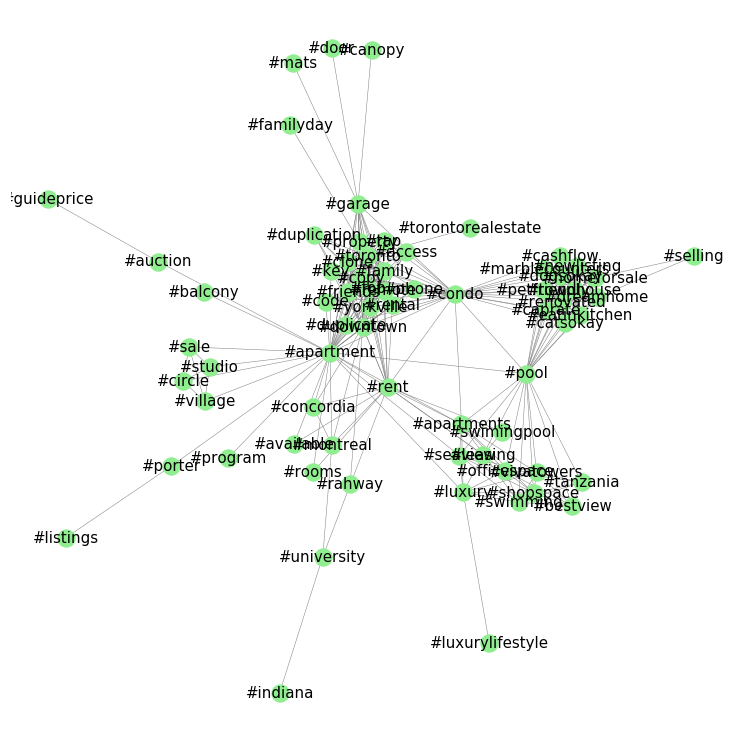

### TOP 10 MOST SIGNIFICANT EDGES BASED ON THE NUMBER OF TWEETS MENTIONING BOTH END NODES ###
('#rent', '#apartment', 10)
('#downtown', '#apartment', 10)
('#petfriendly', '#renovated', 10)
('#townhouse', '#renovated', 9)
('#townhouse', '#dreamhome', 9)
('#toronto', '#downtown', 9)
('#homeforsale', '#dreamhome', 9)
('#dreamhome', '#renovated', 9)
('#townhouse', '#eatinkitchen', 8)
('#townhouse', '#dogsokay', 8)

### TOP 10 TWEETS SORTED BY FAVORITE COUNT ###


,time,user_id,username,text,retweets,favorites,tweet_hashtags,location,user_id_str
8807,2020-01-11 10:10:51,4877402279,GazTankMotors,flaming great weekend everyone,20,64,#flames #exhaust #supercar #supercarvideos #hy...,"lugano, switzerland",4877402279
1018,2020-03-28 10:19:50,864750761758031872,TheCheeseHut1,open 4pm today amp everything need get tell am...,15,25,#cheese #milk #bread #eggs #ham #bacon #salami...,"1 basin road south, portslade",864750761758031872
8438,2020-01-15 02:35:40,284065755,urbaneer,knew would convince grant front pad,6,8,#tesla #toronto #parking #tore #torontorealest...,toronto ontario canada,284065755
4614,2020-02-20 02:08:05,769947800,Hubbell_Ltg,driving positive first impression visitor s ex...,1,5,#canopy #garage #surface #parking,NaN,769947800
1033,2020-03-27 22:15:38,1130290246913056768,S88SecurityYork,high visibility security patrol checks propert...,6,5,#barrie #innisfil #construction #schools #indu...,"york, simcoe, gta, central on",1130290246913056768
7550,2020-01-22 14:50:06,31123182,RahwayRising,blog post 116unit building monroe street inclu...,0,4,#downtown #rahway #parking,"rahway, nj",31123182
9578,2020-01-02 22:35:01,769947800,Hubbell_Ltg,new pgl8 available 4 distributions 6 outputs 1...,1,4,#outdoorfixture #exteriorlighting #canopy #gar...,NaN,769947800
8854,2020-01-10 17:12:27,2737329635,marcofugaccia,sale agreed 2 bedroom 2 bathroom private looki...,1,3,#penthouse #apartment #balcony #parking #porte...,clerkenwell,2737329635
7935,2020-01-19 10:54:30,1154797290843967494,CenterUmag,1 may riding,0,3,#umag #rent #apartment #croatia #adriatic #vac...,NaN,1154797290843967494
1353,2020-03-24 16:36:41,975375188148842496,SkyLinks_me,1 rera permit 2067477935 price aed 621002 desi...,0,3,#bedroom #apartment #sale #dubai #lobby #syste...,"dubai, united arab emirates",975375188148842496



### TOP 10 TWEETS SORTED BY RETWEET COUNT ###


,time,user_id,username,text,retweets,favorites,tweet_hashtags,location,user_id_str
8807,2020-01-11 10:10:51,4877402279,GazTankMotors,flaming great weekend everyone,20,64,#flames #exhaust #supercar #supercarvideos #hy...,"lugano, switzerland",4877402279
1018,2020-03-28 10:19:50,864750761758031872,TheCheeseHut1,open 4pm today amp everything need get tell am...,15,25,#cheese #milk #bread #eggs #ham #bacon #salami...,"1 basin road south, portslade",864750761758031872
1033,2020-03-27 22:15:38,1130290246913056768,S88SecurityYork,high visibility security patrol checks propert...,6,5,#barrie #innisfil #construction #schools #indu...,"york, simcoe, gta, central on",1130290246913056768
8438,2020-01-15 02:35:40,284065755,urbaneer,knew would convince grant front pad,6,8,#tesla #toronto #parking #tore #torontorealest...,toronto ontario canada,284065755
6699,2020-01-30 18:13:27,2737329635,marcofugaccia,new instructions sale five 12 amp 3 bed availa...,2,2,#apartments #holborn #porter #parking #listings,clerkenwell,2737329635
9238,2020-01-07 12:43:24,175351371,PSRltd,rent space comes,2,0,#parking #rental #apartment #sharingeconomy,0161 401 4000,175351371
9578,2020-01-02 22:35:01,769947800,Hubbell_Ltg,new pgl8 available 4 distributions 6 outputs 1...,1,4,#outdoorfixture #exteriorlighting #canopy #gar...,NaN,769947800
4964,2020-02-16 20:20:00,49335397,ETGuardian,family day street parking free holiday monday ...,1,1,#toronto #familyday #parking #etobicoke #etobto,"toronto, on",49335397
8854,2020-01-10 17:12:27,2737329635,marcofugaccia,sale agreed 2 bedroom 2 bathroom private looki...,1,3,#penthouse #apartment #balcony #parking #porte...,clerkenwell,2737329635
3805,2020-02-27 18:03:14,1140875234146496512,al_zajel,al zajel real estate dubai 1 bedroom 2 bedroom...,1,0,#rent #leasing #gym #parking #swimingpool,"bay square, business bay",1140875234146496512



### ALL USERS THAT HAVE CONTRIBUTED TO THE CREATION OF THIS HASHTAG SUBGRAPH, SORTED BY NUMBER OF TWEETS


,name,number_of_tweets,follower_count
0,fobtoronto6,8,11
1,Inbestments_Usa,8,1087
2,SkyLinks_me,6,535
3,cromwellmgtca,5,87
4,RahwayRising,5,839
5,VIVAtowersTZ,5,70
6,marcofugaccia,4,1408
7,EasternEng1,4,693
8,al_zajel,3,10
9,AuctionHouseRH,3,552


In [40]:
# Several communities were checked, only one left to reduce size of return...
partition_graph = G.subgraph(communities[4][3])
pos = nx.spring_layout(partition_graph)
nx.draw(partition_graph, pos, font_size=15, with_labels=True, width=0.5, node_color='lightgreen', edge_color='grey')
#nx.draw_networkx_labels(partition_graph, pos, labels={'#parking': '#Parking'})
plt.savefig("girvan_newman_hashtag_network.png")
plt.show()
quick_summary_of_subgraph(partition_graph, data)